## Text analysis of 'War and Peace'
Contents:
1. Calculated ratio between direct (quoted) and indirect text
2. Calculated and plotted book & chapter lengths in stacked bar graph
3. Calculated word occurrences and plotted in one comprehensive figure

In [1]:
import json
import re

In [2]:
with open('textbody_dict.json', 'r') as fp:
    data = json.load(fp)

In [3]:
# Use a function to grab all the sentences from the nested dictionary
def get_nested_values(mapping, key_of_interest):
    mappings = [mapping]
    while mappings:
        mapping = mappings.pop()
        try:
            items = mapping.items()
        except AttributeError:
            # we didn't store a mapping earlier on so just skip that value
            continue

        for key, value in items:
            if key == key_of_interest:
                yield value
            else:
                # type of the value will be checked in the next loop
                mappings.append(value)

In [4]:
# Second epilogue has no year so it was set to 0
for year in get_nested_values(data,'year'):
    print(year)

0
1813 - 20
1812 - 13
1812
1812
1812
1812
1812
1812
1811 - 12
1810 - 11
1808 - 10
1806 - 07
1806
1805
1805
1805


In [5]:
def length_quotes(text):
    # Gets the length of quoted text in a str (minus quotation marks)
    quote = re.findall(r'\"([^"]*)\"', text)
    length_quote = 0
    for i in range(len(quote)):
        length_quote += len(quote[i])
    return length_quote, len(quote) # returning len(quote) because there might be more than one set of quotes in one sentence

In [6]:
length_quotes('"test" she said "testttt"')

(11, 2)

In [7]:
direct_len = 0
indirect_len = 0
# Calculate the lengths of direct and indirect speech
for sentence in get_nested_values(data, 'sentence'):
    quote_len, num_quotes = length_quotes(sentence)
    if quote_len > 0:
        direct_len += quote_len
        indirect_len += len(sentence) - (2 * num_quotes) # minus 2 * number of quotes to account for quotation marks
    else:
        indirect_len += len(sentence)

In [8]:
print(direct_len/indirect_len)
print(direct_len/(direct_len+indirect_len))
print(indirect_len/(direct_len+indirect_len))

0.0725569228576954
0.06764855208278964
0.9323514479172104


In [9]:
from collections import Counter
# Brute force function to calculate the length of books and their chapters
# Also indexes the word frequencies using Counter
def book_length_and_wordcount(nested_list):
    book_words = []
    chapters = []
    word_frequency = Counter()
    for i in range(len(nested_list)):
        word_count = 0
        chapter_words = [0]*(len(nested_list[str(i+1)])-1)
        for j in range(len(nested_list[str(i+1)])-1):
            for k in range(len(nested_list[str(i+1)][str(j+1)])):
                for l in range(len(nested_list[str(i+1)][str(j+1)][str(k+1)])):
                    word_count += len(nested_list[str(i+1)][str(j+1)][str(k+1)][str(l+1)]) - 1 # minus 1 for the sentence value
                    chapter_words[j] += len(nested_list[str(i+1)][str(j+1)][str(k+1)][str(l+1)]) - 1
                    for m in range(len(nested_list[str(i+1)][str(j+1)][str(k+1)][str(l+1)]) - 1): # minus 1 for the sentence value
                        word_frequency[nested_list[str(i+1)][str(j+1)][str(k+1)][str(l+1)][str(m+1)]] += 1 # increment word count by 1
        book_words.append(word_count)
        chapters.append(chapter_words)
    return book_words, chapters, word_frequency

In [10]:
book_len, chapter_len, word_count = book_length_and_wordcount(data)
print(book_len)
print((chapter_len[16]))
print(sum(book_len))
print(sum(chapter_len[16]))

[48788, 41250, 44842, 23949, 34191, 33823, 23306, 31618, 38480, 65831, 52685, 24641, 20467, 20904, 24678, 24560, 17761]
[1773, 1636, 879, 2372, 1119, 1374, 1298, 1713, 2125, 2015, 613, 844]
571774
17761


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

books = len(data)
ind = np.arange(books)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

df=pd.DataFrame()

for i in range(39):
    row = [0]*books
    for j in range(books):
        if i < len(chapter_len[j]):
            row[j] = (chapter_len[j][i])
        else:
            row[j] = 0
    df['Chapter '+str(i+1)] = row

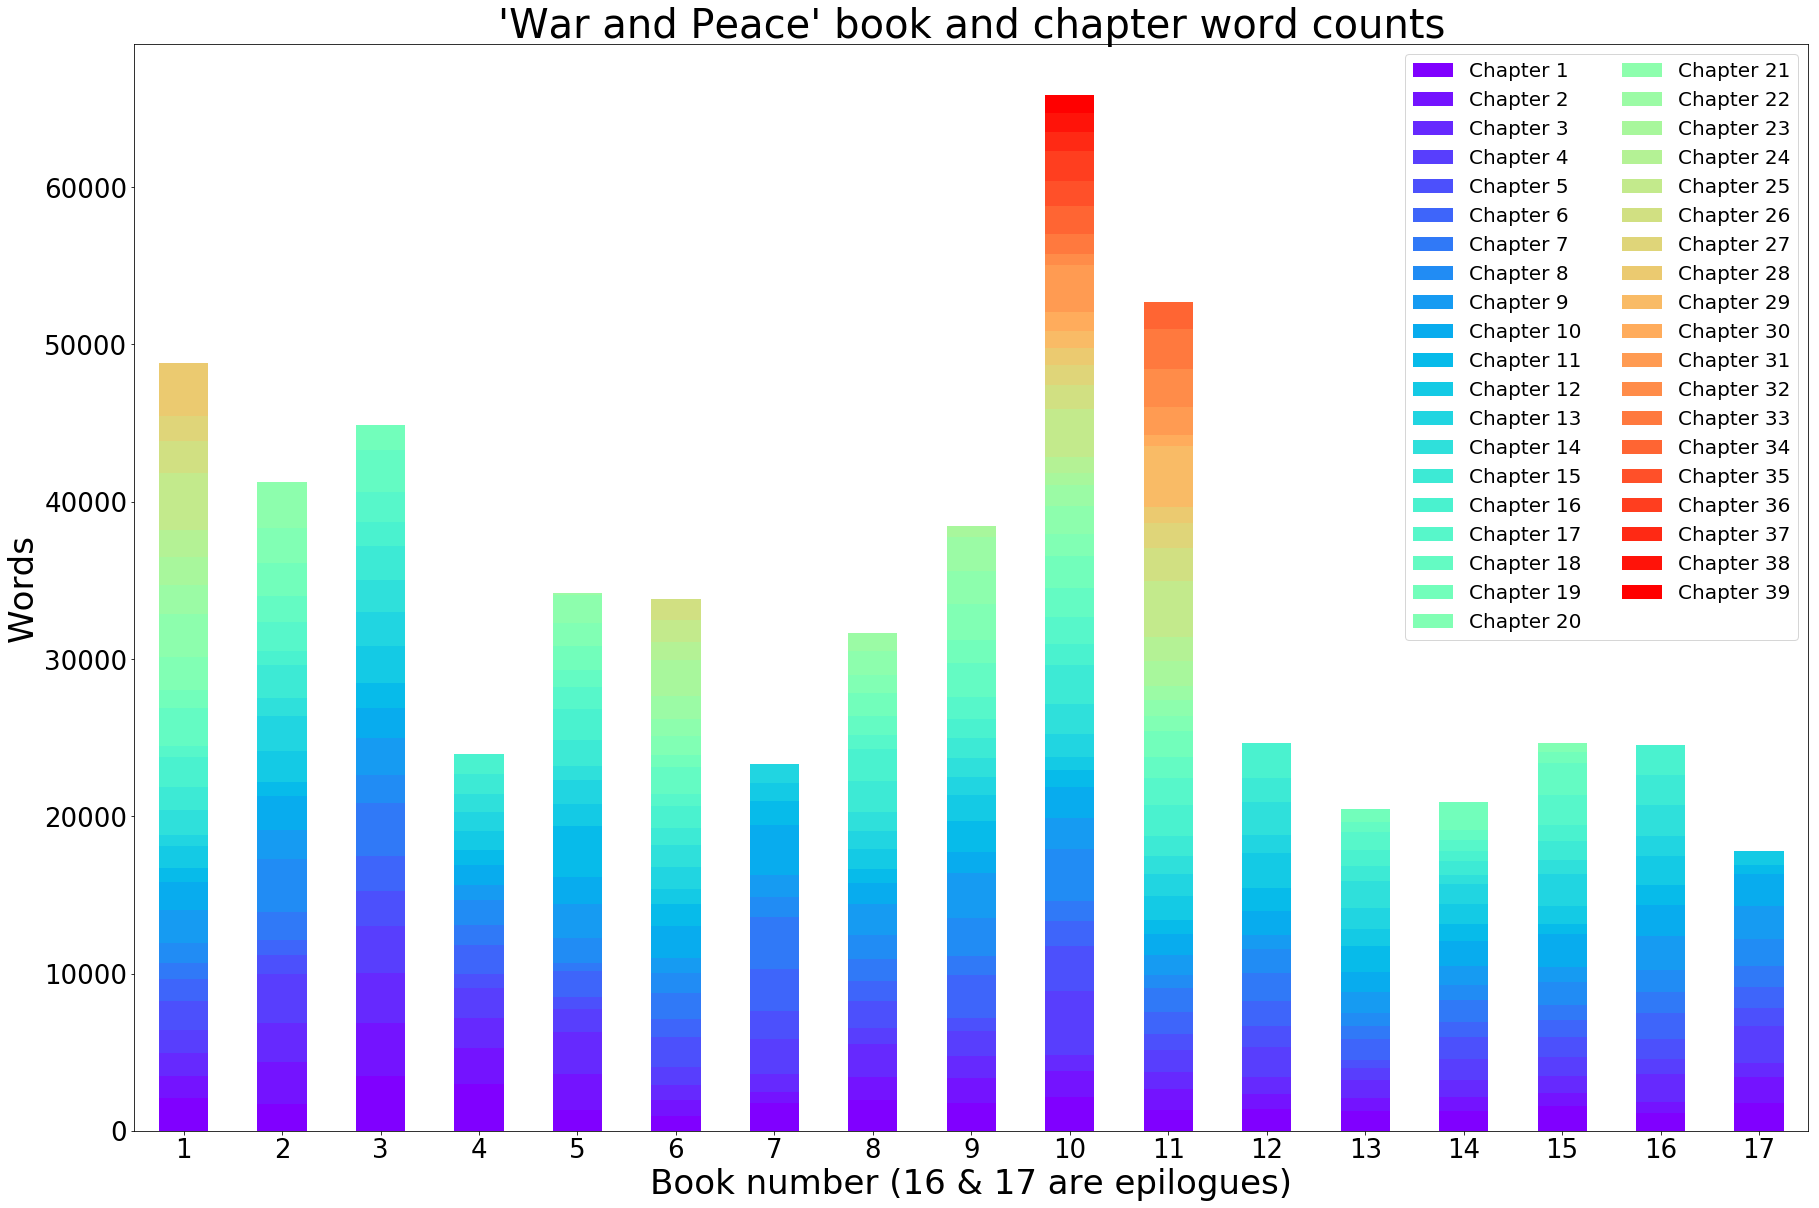

In [12]:
# Plot the data on a stacked bar plot
ax = df.plot(kind='bar', stacked=True, colormap='rainbow', title="'War and Peace' book and chapter word counts",\
             fontsize = 26, figsize=(30,20), rot=0)
ax.set_xticklabels(range(1,18))
ax.legend(
       scatterpoints=1,
   loc='best',
   ncol=2,
   markerscale=0.5,
   fontsize=20)
ax.set_xlabel('Book number (16 & 17 are epilogues)', fontsize = 34)
ax.set_ylabel('Words', fontsize = 34)
ax.title.set_size(40)

fig = ax.get_figure()
fig.savefig('bookchapter_wordcount.pdf')

In [13]:
word_count

Counter({'well': 746,
         'prince': 1927,
         'so': 1900,
         'genoa': 3,
         'and': 22226,
         'lucca': 2,
         'are': 1286,
         'now': 1331,
         'just': 568,
         'family': 144,
         'estates': 39,
         'of': 14889,
         'the': 34540,
         'buonapartes': 1,
         'but': 4043,
         'i': 4477,
         'warn': 6,
         'you': 3790,
         'if': 1292,
         'do': 1567,
         "n't": 1155,
         'tell': 375,
         'me': 1269,
         'that': 8183,
         'this': 2074,
         'means': 70,
         'war': 296,
         'still': 675,
         'try': 71,
         'to': 16671,
         'defend': 18,
         'infamies': 1,
         'horrors': 8,
         'perpetrated': 3,
         'by': 2437,
         'antichrist': 5,
         'really': 202,
         'believe': 123,
         'he': 10002,
         'is': 3365,
         'will': 1067,
         'have': 2002,
         'nothing': 473,
         'more': 1056,
      

In [14]:
with open('word_counts.json','w') as fp:
    json.dump(word_count, fp, indent=4)

In [15]:
words_sorted_by_count = sorted(word_count.items(), reverse=True, key=lambda kv: kv[1])
words_sorted_by_count

[('the', 34540),
 ('and', 22226),
 ('to', 16671),
 ('of', 14889),
 ('a', 10544),
 ('he', 10002),
 ('in', 8979),
 ('that', 8183),
 ('his', 7984),
 ('was', 7372),
 ('with', 5663),
 ('it', 5595),
 ('had', 5373),
 ('not', 4840),
 ('her', 4725),
 ('him', 4636),
 ('at', 4531),
 ('i', 4477),
 ("'s", 4390),
 ('but', 4043),
 ('as', 4023),
 ('on', 4000),
 ('you', 3790),
 ('for', 3527),
 ('she', 3489),
 ('is', 3365),
 ('said', 2841),
 ('all', 2793),
 ('from', 2687),
 ('be', 2438),
 ('by', 2437),
 ('were', 2432),
 ('what', 2391),
 ('they', 2251),
 ('who', 2165),
 ('one', 2126),
 ('this', 2074),
 ('which', 2057),
 ('have', 2002),
 ('pierre', 1962),
 ('prince', 1927),
 ('so', 1900),
 ('an', 1629),
 ('up', 1578),
 ('do', 1567),
 ('there', 1558),
 ('did', 1535),
 ('them', 1528),
 ('or', 1524),
 ('when', 1494),
 ('been', 1476),
 ('their', 1440),
 ('no', 1397),
 ('would', 1385),
 ('now', 1331),
 ('only', 1298),
 ('if', 1292),
 ('are', 1286),
 ('me', 1269),
 ('out', 1239),
 ('my', 1225),
 ('natasha', 121

In [16]:
# Filter out the stop words for visualization
from nltk.corpus import stopwords
filtered_words = [(word[0], word[1]) for word in words_sorted_by_count if word[0] not in stopwords.words('english')]
# Remove 's from the list
filtered_words = filtered_words[1:]

In [17]:
# Convert alphabet letter to number index
def alpha_to_int(letter):
    char = 'abcdefghijklmnopqrstuvwxyz'
    return char.find(letter) + 1

def get_alpha_index(word):
    index = 0
    for letter in word:
        index += alpha_to_int(letter)
    return index

In [18]:
from nltk import pos_tag
letter_index = [0]*len(filtered_words)
alpha_index = [0]*len(filtered_words)
word_freq = [0]*len(filtered_words)
word_full = [0]*len(filtered_words)
word_pos = [0]*len(filtered_words)
for i,word in enumerate(filtered_words):
    letter_index[i] = alpha_to_int(word[0][0])
    alpha_index[i] = get_alpha_index(word[0])
    word_freq[i] = word[1]
    # Tag words by part of speech (single word tagging - not ideal, but will give an idea of typical PoS)
    word_pos[i] = pos_tag([word[0]])[0][1]
    # treat a couple of edge cases
    if word[0] == "'ll":
        letter_index[i] = alpha_to_int('w')
        word_full[i] = 'will'
        word_pos[i] = pos_tag([word[0]])[0][1]
    elif word[0] == 'ca':
        word_full[i] = 'can'
        word_pos[i] = pos_tag([word[0]])[0][1]
    elif word[0] == "n't":
        word_full[i] = 'not'
        word_pos[i] = pos_tag([word[0]])[0][1]
    else:
        word_full[i] = word[0]

In [19]:
df_words = pd.DataFrame()
df_words['Word'] = word_full
df_words['Letter_index'] = letter_index
df_words['Alpha_index'] = alpha_index
df_words['Word_count'] = word_freq
df_words['Word_PoS'] = word_pos

d = {'VBD': 'r', 'VB': 'r', 'VBG': 'r', 'VBN': 'r', 'PRP': 'b', 'CD': 'm', 'NN': 'b', 'NNS': 'b',\
     'MD': 'r', 'RB': 'g', 'JJ': 'm', 'DT': 'm', 'IN': 'y'}
df_words['Word_color'] = df_words['Word_PoS'].map(d).astype(str)

Text(20.55,10,'Prep./conjunctions')

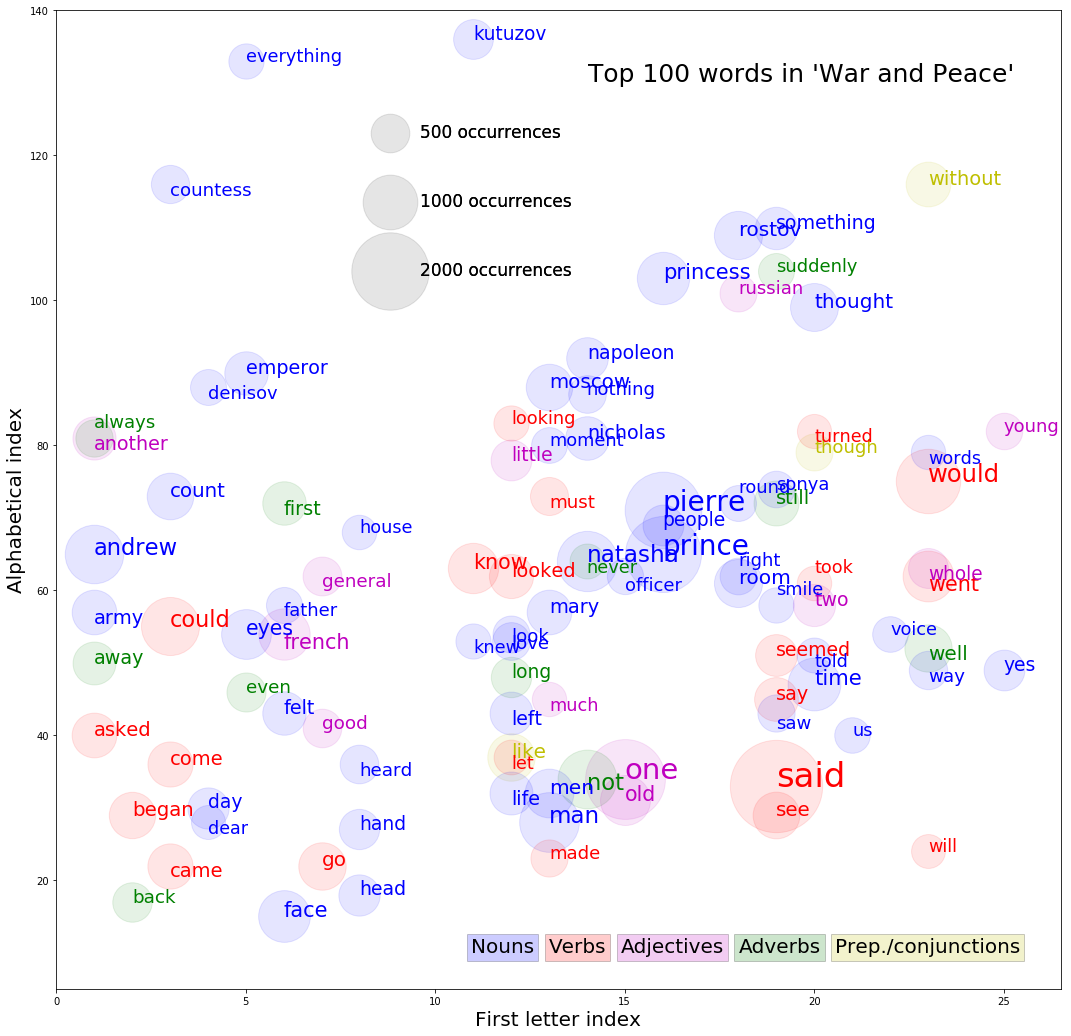

In [20]:
fig, ax = plt.subplots(facecolor='w', figsize=(18,18))
# Define some used indices to control for word collisions
used_letterindices = set()
used_alphaindices = set()
# Unfortunately have to plot the circles and words in a for loop
for key, row in df_words[:100].iterrows():
    ax.scatter(row['Letter_index'], row['Alpha_index'], s=row['Word_count']*3, c=row['Word_color'], alpha=.1)
    # Treat some edge cases
    if row['Word'] == 'officer' or row['Word'] == 'saw' or row['Word'] == 'went' or row['Word'] == 'french' or\
    row['Word'] == 'love':
        ax.annotate(row['Word'], xy=(row['Letter_index'], row['Alpha_index']-2), \
                    fontsize=row['Word_count']/150+15, color=row['Word_color'])
        used_letterindices.add(row['Letter_index'])
        used_alphaindices.add(row['Alpha_index']-2)
    # Avoid word collisions
    elif row['Letter_index'] in used_letterindices and row['Alpha_index'] in used_alphaindices:
        if row['Alpha_index']-1.5 not in used_alphaindices:
            ax.annotate(row['Word'], xy=(row['Letter_index'], row['Alpha_index']-1.5), \
                        fontsize=row['Word_count']/150+15, color=row['Word_color'])
            used_letterindices.add(row['Letter_index'])
            used_alphaindices.add(row['Alpha_index']-1.5)
        else:
            ax.annotate(row['Word'], xy=(row['Letter_index'], row['Alpha_index']+1.5), \
                        fontsize=row['Word_count']/150+15, color=row['Word_color'])
            used_letterindices.add(row['Letter_index'])
            used_alphaindices.add(row['Alpha_index']+1.5)
    else:
        ax.annotate(row['Word'], xy=(row['Letter_index'], row['Alpha_index']), \
                    fontsize=row['Word_count']/150+15, color=row['Word_color'])
        used_letterindices.add(row['Letter_index'])
        used_alphaindices.add(row['Alpha_index'])

# Axis properties
ax.set_xlabel('First letter index', fontsize = 20)
ax.set_ylabel('Alphabetical index', fontsize = 20)
ax.set_xlim(0,26.5)
ax.set_ylim(5,140)
title = fig.suptitle("Top 100 words in 'War and Peace'", fontsize=25)
title.set_position([.7, 0.84])

# Here we create a couple of legends:
# we'll plot empty lists with the desired size and label
for words in [500, 1000, 2000]:
    plt.scatter([], [], c='k', alpha=0.05, s=words*3,
                label=str(words) + ' occurrences')
first_legend = ax.legend(scatterpoints=1, frameon=False, labelspacing=3, fontsize = 17, bbox_to_anchor=(.3, .9), loc=2)
ax.add_artist(first_legend)

plt.text(10.95, 10, 'Nouns', fontsize=20, bbox=dict(facecolor='b', alpha=0.2))
plt.text(13, 10, 'Verbs', fontsize=20, bbox=dict(facecolor='r', alpha=0.2))
plt.text(14.9, 10, 'Adjectives', fontsize=20, bbox=dict(facecolor='m', alpha=0.2))
plt.text(18, 10, 'Adverbs', fontsize=20, bbox=dict(facecolor='g', alpha=0.2))
plt.text(20.55, 10, 'Prep./conjunctions', fontsize=20, bbox=dict(facecolor='y', alpha=0.2))

In [21]:
fig.savefig('top100words.pdf')

In [22]:
print(len(word_count))
print(len(filtered_words))

17771
17634
